In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [72]:
# Load the data
data = pd.read_csv('BankChurners.csv')

data.shape

(10127, 23)

In [73]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [74]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [75]:
data.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [104]:
columns_to_drop = ['CLIENTNUM',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
if isinstance(data, pd.DataFrame):
    data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])
data.shape, data.columns

# dataset = data   # Create a copy of the data to work with it without modifying the original data

In [77]:
# objective columns
data[['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']]

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


In [78]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['Attrition_Flag'] = encoder.fit_transform(data['Attrition_Flag'])
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Education_Level'] = encoder.fit_transform(data['Education_Level'])
data['Marital_Status'] = encoder.fit_transform(data['Marital_Status'])
data['Income_Category'] = encoder.fit_transform(data['Income_Category'])
data['Card_Category'] = encoder.fit_transform(data['Card_Category'])

data[['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']]



,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,1,1,3,1,2,0
1,1,0,2,2,4,0
2,1,1,2,1,3,0
3,1,0,3,3,4,0
4,1,1,5,1,2,0
...,...,...,...,...,...,...
10122,1,1,2,2,1,0
10123,0,1,6,0,1,0
10124,0,0,3,1,4,0
10125,0,1,2,3,1,0


In [79]:
data.dtypes

Attrition_Flag                int32
Customer_Age                  int64
Gender                        int32
Dependent_count               int64
Education_Level               int32
Marital_Status                int32
Income_Category               int32
Card_Category                 int32
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

# preprocessing

In [80]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


                          Attrition_Flag  Customer_Age  Gender  \
Attrition_Flag                      1.00         -0.02    0.04   
Customer_Age                       -0.02          1.00   -0.02   
Gender                              0.04         -0.02    1.00   
Dependent_count                    -0.02         -0.12    0.00   
Education_Level                    -0.01          0.00    0.00   
Marital_Status                     -0.02         -0.01   -0.00   
Income_Category                    -0.02         -0.01   -0.54   
Card_Category                       0.01         -0.02    0.08   
Months_on_book                     -0.01          0.79   -0.01   
Total_Relationship_Count            0.15         -0.01    0.00   
Months_Inactive_12_mon             -0.15          0.05   -0.01   
Contacts_Count_12_mon              -0.20         -0.02    0.04   
Credit_Limit                        0.02          0.00    0.42   
Total_Revolving_Bal                 0.26          0.01    0.03   
Avg_Open_T

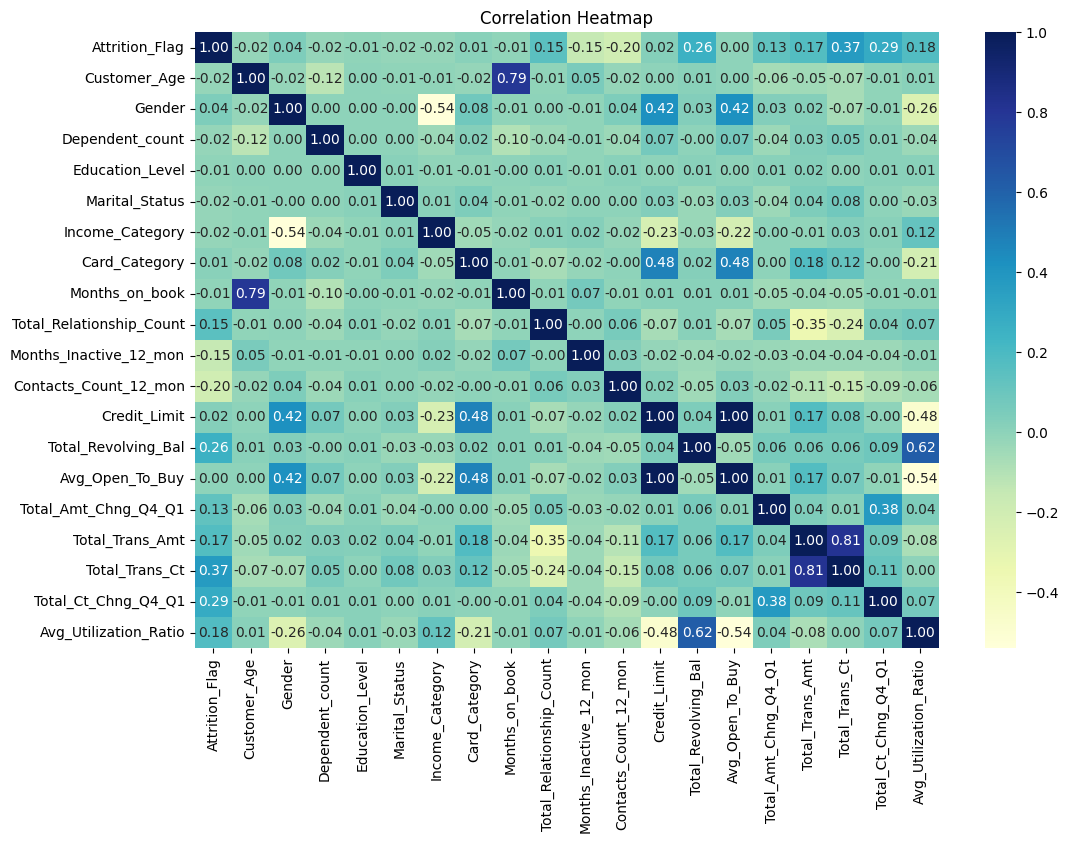

In [81]:
import seaborn as sb
import matplotlib.pyplot as mp

# Calculate correlation matrix
Corr_Matrix = round(data.corr(numeric_only=True), 2)
print(Corr_Matrix)

# Set the figure size before plotting
mp.figure(figsize=(12, 8))  # Width x Height in inches

# Plotting correlation heatmap
dataplot = sb.heatmap(Corr_Matrix, cmap="YlGnBu", annot=True, fmt=".2f")

# Add a title for clarity
mp.title("Correlation Heatmap")

# Displaying the heatmap
mp.show()

In [82]:
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']
X = np.array(X)
y = np.array(y)

In [83]:
# X = X.reshape(-1, 1)
# y = y.reshape(-1, 1)

In [84]:
X, y

(array([[4.500e+01, 1.000e+00, 3.000e+00, ..., 4.200e+01, 1.625e+00,
         6.100e-02],
        [4.900e+01, 0.000e+00, 5.000e+00, ..., 3.300e+01, 3.714e+00,
         1.050e-01],
        [5.100e+01, 1.000e+00, 3.000e+00, ..., 2.000e+01, 2.333e+00,
         0.000e+00],
        ...,
        [4.400e+01, 0.000e+00, 1.000e+00, ..., 6.000e+01, 8.180e-01,
         0.000e+00],
        [3.000e+01, 1.000e+00, 2.000e+00, ..., 6.200e+01, 7.220e-01,
         0.000e+00],
        [4.300e+01, 0.000e+00, 2.000e+00, ..., 6.100e+01, 6.490e-01,
         1.890e-01]]),
 array([1, 1, 1, ..., 0, 0, 0]))

In [85]:
data['Attrition_Flag'].value_counts()

Attrition_Flag
1    8500
0    1627
Name: count, dtype: int64

In [86]:
# We separate the samples of the different classes
class_one_idx = np.argwhere(y==1)
class_zero_idx = np.argwhere(y==0)

class_one_x = np.squeeze(X[class_one_idx])
class_zero_x = np.squeeze(X[class_zero_idx])

print("Shape of class 0 samples: ", class_zero_x.shape)
print("Shape of class 1 samples: ", class_one_x.shape)

Shape of class 0 samples:  (1627, 19)
Shape of class 1 samples:  (8500, 19)


# resampling

In [87]:
from sklearn.utils import resample

# Upsample minority class
class_zero_upsampled = resample(class_zero_x, 
                                 replace=True,     # sample with replacement
                                 n_samples=8500,    # to match majority class
                                 random_state=123) # reproducible results

print("New shape of class 0 samples: ",class_zero_upsampled.shape)

# Downsample majority class
class_one_downsampled = resample(class_one_x, 
                                 replace=True,     # sample with replacement
                                 n_samples=1627,    # to match minority class
                                 random_state=123) # reproducible results

print("New shape of class 1 samples: ",class_one_downsampled.shape)

New shape of class 0 samples:  (8500, 19)
New shape of class 1 samples:  (1627, 19)


In [88]:
X_balanced = np.concatenate((class_zero_upsampled, class_one_x), axis=0)
print("(Upsampled) Balanced data set shape: ", X_balanced.shape)

X_balanced = np.concatenate((class_one_downsampled, class_zero_x), axis=0)
print("(Downsampled) Balanced data set shape: ", X_balanced.shape)

(Upsampled) Balanced data set shape:  (17000, 19)
(Downsampled) Balanced data set shape:  (3254, 19)


Normalize

In [89]:
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# Z-score Normalisation with Standard Scaler from SKlearn: returns an nparray
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(data)
data_scaled = scaler.transform(data)
columns_names = data.columns  # Define columns_names
data_scaled_df = pd.DataFrame(data_scaled, columns=columns_names)
data_scaled_df.head()


X

array([[4.500e+01, 1.000e+00, 3.000e+00, ..., 4.200e+01, 1.625e+00,
        6.100e-02],
       [4.900e+01, 0.000e+00, 5.000e+00, ..., 3.300e+01, 3.714e+00,
        1.050e-01],
       [5.100e+01, 1.000e+00, 3.000e+00, ..., 2.000e+01, 2.333e+00,
        0.000e+00],
       ...,
       [4.400e+01, 0.000e+00, 1.000e+00, ..., 6.000e+01, 8.180e-01,
        0.000e+00],
       [3.000e+01, 1.000e+00, 2.000e+00, ..., 6.200e+01, 7.220e-01,
        0.000e+00],
       [4.300e+01, 0.000e+00, 2.000e+00, ..., 6.100e+01, 6.490e-01,
        1.890e-01]])

In [ ]:
# import seaborn as sb
# import matplotlib.pyplot as mp

# # Calculate correlation matrix
# Corr_Matrix = round(data.corr(numeric_only=True), 2)
# print(Corr_Matrix)
# # 
# # Set the figure size before plotting
# # mp.figure(figsize=(12, 8))  # Width x Height in inches

# # Plotting correlation heatmap
# dataplot = sb.heatmap(Corr_Matrix, cmap="YlGnBu", annot=True, fmt=".2f")

# # Add a title for clarity
# mp.title("Correlation Heatmap")

# # Displaying the heatmap
# mp.show()


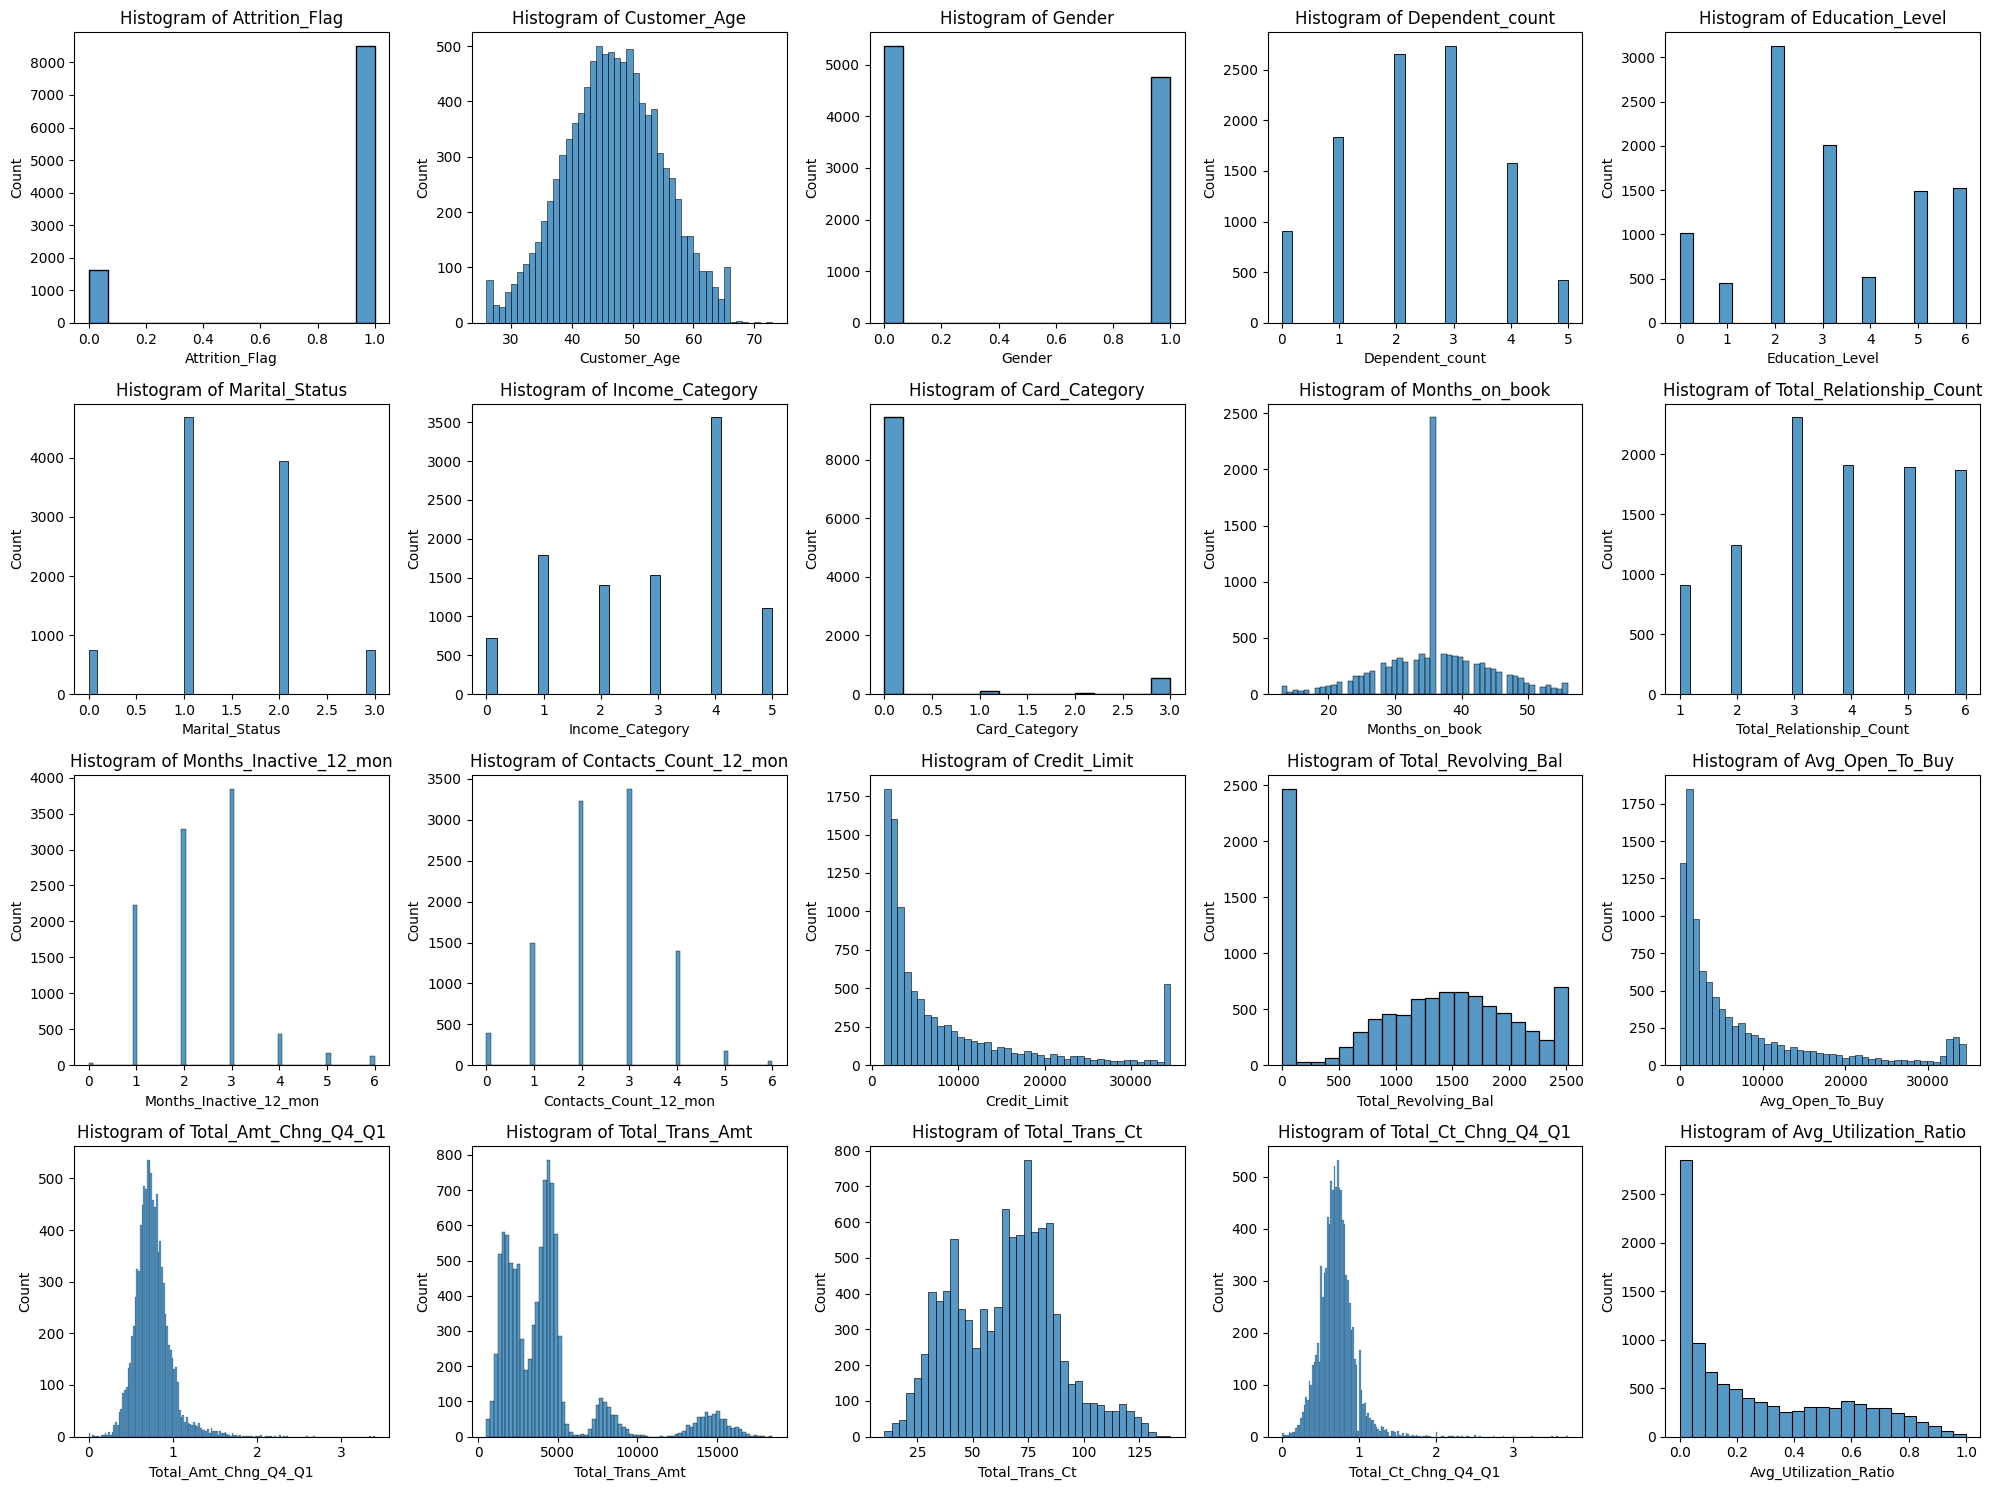

In [91]:
import matplotlib.pyplot as plt
import seaborn as sb

# Number of columns in the dataset
num_columns = len(data.columns)

# Calculate grid size (e.g., 4 rows x 5 columns for 20 plots)
rows = 4  # Adjust based on the number of histograms
cols = 5

# Set the figure size
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))  # Adjust size for clarity

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each column in a subplot
for i, col in enumerate(data.columns):
    sb.histplot(data[col], ax=axes[i], kde=False)
    axes[i].set_title(f"Histogram of {col}")

# Hide any unused subplots (in case num_columns < rows*cols)
for j in range(num_columns, rows * cols):
    fig.delaxes(axes[j])

# Add spacing for clarity
plt.tight_layout()

# Display all histograms
plt.show()


Highly Correlated Pairs: [('Attrition_Flag', 'Total_Relationship_Count'), ('Attrition_Flag', 'Months_Inactive_12_mon'), ('Attrition_Flag', 'Contacts_Count_12_mon'), ('Attrition_Flag', 'Total_Revolving_Bal'), ('Attrition_Flag', 'Total_Amt_Chng_Q4_Q1'), ('Attrition_Flag', 'Total_Trans_Amt'), ('Attrition_Flag', 'Total_Trans_Ct'), ('Attrition_Flag', 'Total_Ct_Chng_Q4_Q1'), ('Attrition_Flag', 'Avg_Utilization_Ratio'), ('Customer_Age', 'Dependent_count'), ('Customer_Age', 'Months_on_book'), ('Gender', 'Income_Category'), ('Gender', 'Credit_Limit'), ('Gender', 'Avg_Open_To_Buy'), ('Gender', 'Avg_Utilization_Ratio'), ('Dependent_count', 'Months_on_book'), ('Income_Category', 'Credit_Limit'), ('Income_Category', 'Avg_Open_To_Buy'), ('Income_Category', 'Avg_Utilization_Ratio'), ('Card_Category', 'Credit_Limit'), ('Card_Category', 'Avg_Open_To_Buy'), ('Card_Category', 'Total_Trans_Amt'), ('Card_Category', 'Total_Trans_Ct'), ('Card_Category', 'Avg_Utilization_Ratio'), ('Total_Relationship_Count', 

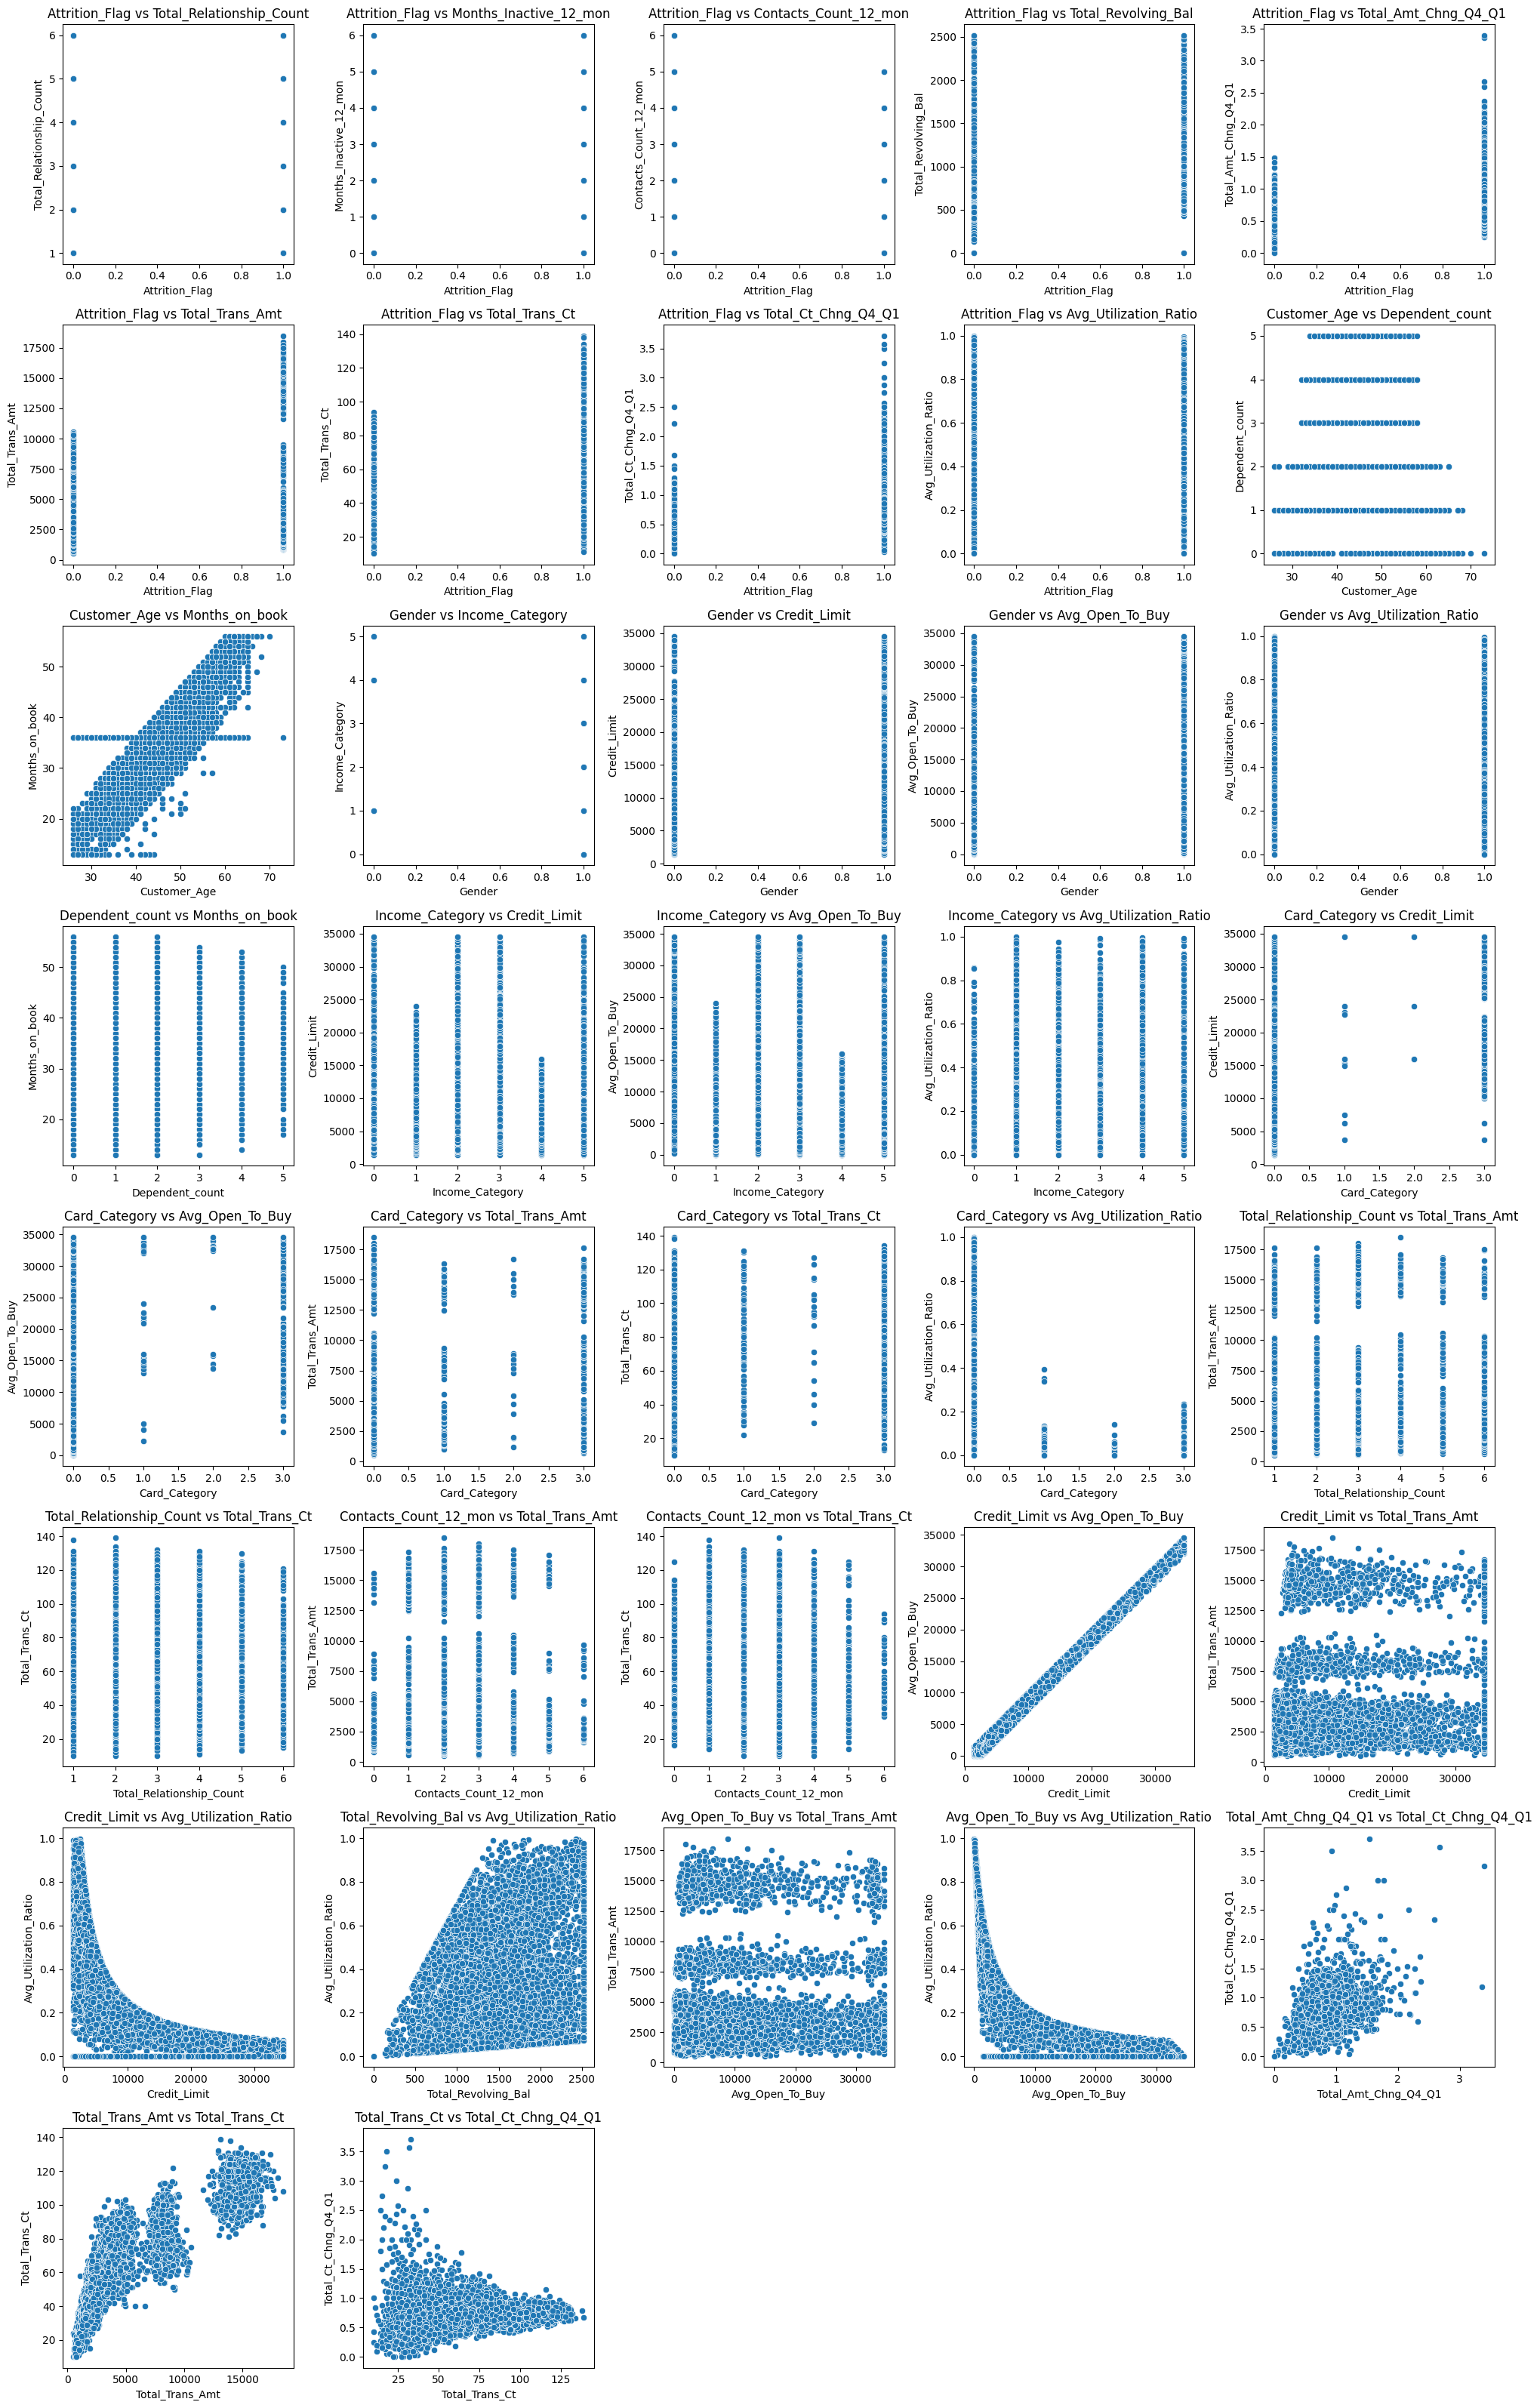

In [92]:
import seaborn as sb

# Step 1: Calculate correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Step 2: Find highly correlated column pairs
threshold = 0.1  # Adjust the threshold for correlation
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):  # Avoid duplicates
        if abs(corr_matrix.iloc[i, j]) > threshold:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            high_corr_pairs.append((col1, col2))

print("Highly Correlated Pairs:", high_corr_pairs)

# Step 3: Set up 5 charts per row
num_pairs = len(high_corr_pairs)
cols = 5  # 5 plots per row
rows = max((num_pairs + cols - 1) // cols, 1)  # Calculate the number of rows needed, ensure at least 1 row

# Step 4: Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))  # Adjust figure size for clarity
axes = axes.flatten()  # Flatten axes for easier iteration

# Step 5: Plot scatter plots for highly correlated pairs
for idx, (col1, col2) in enumerate(high_corr_pairs):
    sb.scatterplot(x=data[col1], y=data[col2], ax=axes[idx])
    axes[idx].set_title(f"{col1} vs {col2}")
    axes[idx].set_xlabel(col1)
    axes[idx].set_ylabel(col2)

# Step 6: Hide unused axes
for i in range(len(high_corr_pairs), len(axes)):
    fig.delaxes(axes[i])

# Step 7: Adjust layout and display
plt.tight_layout()
plt.show()

    

# Classification

In [93]:
# spliting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [94]:
def logistic_regression(X_train, y_train):

    from sklearn.linear_model import LogisticRegression

    model = LogisticRegression()
    logistic_regression = model.fit(X_train, y_train)
    return logistic_regression


def random_forest(X_train, y_train):

    from sklearn.ensemble import RandomForestClassifier

    model = RandomForestClassifier()
    random_forest = model.fit(X_train, y_train)
    return random_forest

def decision_tree(X_train, y_train):

    from sklearn.tree import DecisionTreeClassifier

    model = DecisionTreeClassifier()
    decision_tree = model.fit(X_train, y_train)
    return decision_tree

def knn(X_train, y_train):

    from sklearn.neighbors import KNeighborsClassifier

    model = KNeighborsClassifier()
    knn = model.fit(X_train, y_train)
    return knn

def svm(X_train, y_train):
    
    from sklearn.svm import SVC

    model = SVC()
    svm = model.fit(X_train, y_train)
    return svm

def naive_bayes(X_train, y_train):

    from sklearn.naive_bayes import GaussianNB

    model = GaussianNB()
    naive_bayes = model.fit(X_train, y_train)
    return naive_bayes

def neural_network(X_train, y_train):

    from sklearn.neural_network import MLPClassifier

    model = MLPClassifier()
    neural_network = model.fit(X_train, y_train)
    return neural_network

logistic_regression = logistic_regression(X_train, y_train)
random_forest = random_forest(X_train, y_train)
decision_tree = decision_tree(X_train, y_train)
knn = knn(X_train, y_train)
svm = svm(X_train, y_train)
naive_bayes = naive_bayes(X_train, y_train)
neural_network = neural_network(X_train, y_train)

model_list = [logistic_regression, random_forest, decision_tree, knn, svm, naive_bayes, neural_network]


c:\Users\becod\AI\projects\00-AI\AIvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Train Accuracy: 0.8756943587211455
Test Accuracy: 0.8775913129318855


Model: RandomForestClassifier
Train Accuracy: 1.0
Test Accuracy: 0.9595261599210266


Model: DecisionTreeClassifier
Train Accuracy: 1.0
Test Accuracy: 0.9299111549851925


Model: KNeighborsClassifier
Train Accuracy: 0.9203801999753117
Test Accuracy: 0.8928923988153998


Model: SVC
Train Accuracy: 0.8400197506480681
Test Accuracy: 0.8366238894373149


Model: GaussianNB
Train Accuracy: 0.8975435131465251
Test Accuracy: 0.8845014807502468


Model: MLPClassifier
Train Accuracy: 0.8835946179484014
Test Accuracy: 0.8815399802566634




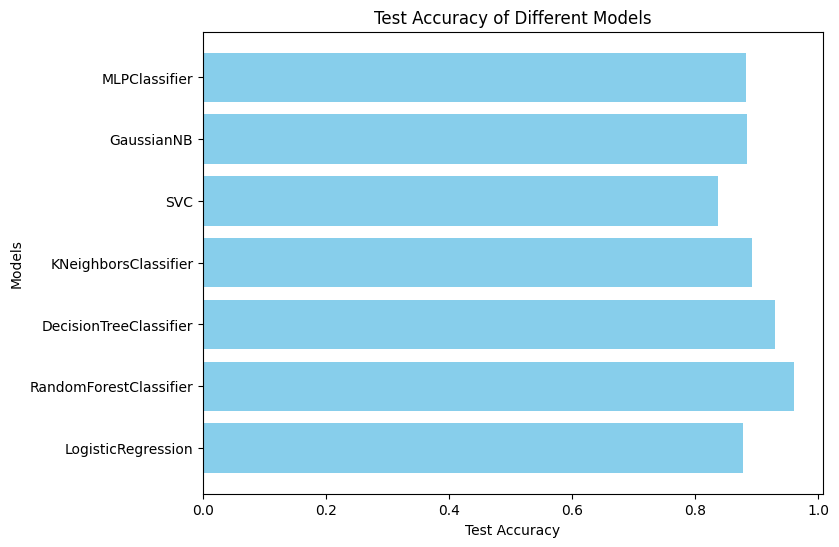

In [140]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

results = []

for i in model_list:

    y_predict_train  = i.predict(X_train)
    y_predict_test = i.predict(X_test)

    confusion_matrix_train = confusion_matrix(y_train, y_predict_train)
    confusion_matrix_test = confusion_matrix(y_test, y_predict_test)

    accuracy_train = accuracy_score(y_train, y_predict_train)
    accuracy_test = accuracy_score(y_test, y_predict_test)
    
    recall_train = recall_score(y_train, y_predict_train)
    recall_test = recall_score(y_test, y_predict_test)

    precision_train = precision_score(y_train, y_predict_train)
    precision_test = precision_score(y_test, y_predict_test)

    f1_train = f1_score(y_train, y_predict_train)
    f1_test = f1_score(y_test, y_predict_test)

    # Append results as a list
    results.append([
        i.__class__.__name__,  # Model name
        accuracy_train,        # Train Accuracy
        accuracy_test,         # Test Accuracy
        recall_train,          # Train Recall
        recall_test,           # Test Recall
        precision_train,       # Train Precision
        precision_test,        # Test Precision
        f1_train,              # Train F1
        f1_test                # Test F1
    ])

    print(f"Model: {i.__class__.__name__}")
    # print(f"Train Confusion Matrix: \n{confusion_matrix_train}")
    # print(f"Test Confusion Matrix: \n{confusion_matrix_test}")
    print(f"Train Accuracy: {accuracy_train}")
    print(f"Test Accuracy: {accuracy_test}")
    # print(f"Train Recall: {recall_train}")
    # print(f"Test Recall: {recall_test}")
    # print(f"Train Precesion: {precision_train}")
    # print(f"Test Precesion: {precision_test}")
    # print(f"Train F1: {f1_train}")
    # print(f"Test F1: {f1_test}")
    print("\n")


# استخراج دقت‌های تست و نام مدل‌ها
model_names = [result[0] for result in results]  # نام مدل‌ها
test_accuracies = [result[2] for result in results]  # دقت تست مدل‌ها


plt.figure(figsize=(8, 6))
plt.barh(model_names, test_accuracies, color='skyblue')  
plt.xlabel('Test Accuracy')
plt.ylabel('Models')
plt.title('Test Accuracy of Different Models')
plt.show()




# Feature Importance

                     Feature  Importance
16            Total_Trans_Ct    0.180611
15           Total_Trans_Amt    0.177126
17       Total_Ct_Chng_Q4_Q1    0.105681
12       Total_Revolving_Bal    0.105615
8   Total_Relationship_Count    0.072771
18     Avg_Utilization_Ratio    0.065096
14      Total_Amt_Chng_Q4_Q1    0.064080
11              Credit_Limit    0.033742
0               Customer_Age    0.033034
13           Avg_Open_To_Buy    0.029846
10     Contacts_Count_12_mon    0.027895
7             Months_on_book    0.025270
9     Months_Inactive_12_mon    0.025097
3            Education_Level    0.012075
2            Dependent_count    0.012031
5            Income_Category    0.010940
4             Marital_Status    0.008933
1                     Gender    0.007797
6              Card_Category    0.002359


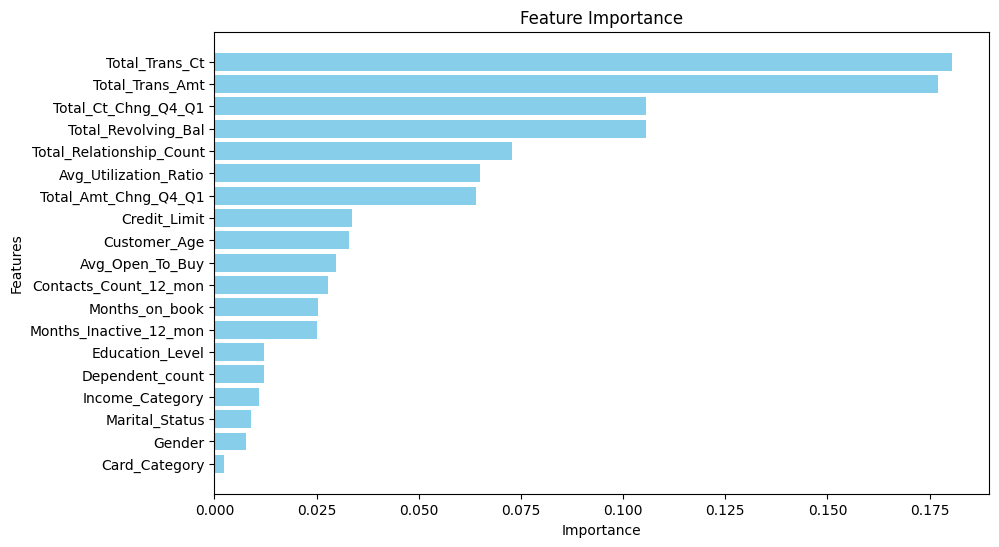

In [96]:

# extract feature importances
feature_importances = random_forest.feature_importances_

# Create a DataFrame to store the feature importances
features_df = pd.DataFrame({
    "Feature": data.columns.drop('Attrition_Flag'),  # Use column names from the original DataFrame
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)


print(features_df)


plt.figure(figsize=(10, 6))
plt.barh(features_df["Feature"], features_df["Importance"], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()


# predict the high risk clients (churn)

In [ ]:
# Ensure 'Attrition_Flag' is not included in X_test
X_test_no_flag = pd.DataFrame(X_test, columns=data.columns.drop('Attrition_Flag'))

# predict probabilities of churn for the test data
predicted_proba = random_forest.predict_proba(X_test_no_flag)

# Add the predicted probabilities as a new column
X_test_no_flag["Churn_Probability"] = predicted_proba[:, 1]

# display the top 5 rows of the DataFrame with the predicted probabilities
# print(X_test_no_flag.head())


# define the threshold for high-risk customers
threshold = 0.5

# filter customers with a churn probability higher than the threshold
high_risk_clients = X_test_no_flag[X_test_no_flag["Churn_Probability"] > threshold]

print(high_risk_clients)

# save the high-risk customers to a CSV file
high_risk_clients.to_csv("high_risk_clients.csv", index=False)


c:\Users\becod\AI\projects\00-AI\AIvenv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


      Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
0             43.0     1.0              5.0              2.0             3.0   
2             48.0     0.0              2.0              3.0             1.0   
4             37.0     0.0              4.0              0.0             1.0   
5             38.0     0.0              3.0              0.0             1.0   
8             50.0     0.0              2.0              2.0             2.0   
...            ...     ...              ...              ...             ...   
2021          63.0     1.0              1.0              3.0             2.0   
2022          41.0     1.0              1.0              2.0             1.0   
2023          46.0     1.0              3.0              2.0             1.0   
2024          53.0     1.0              4.0              6.0             2.0   
2025          47.0     1.0              5.0              0.0             2.0   

      Income_Category  Card_Category  M

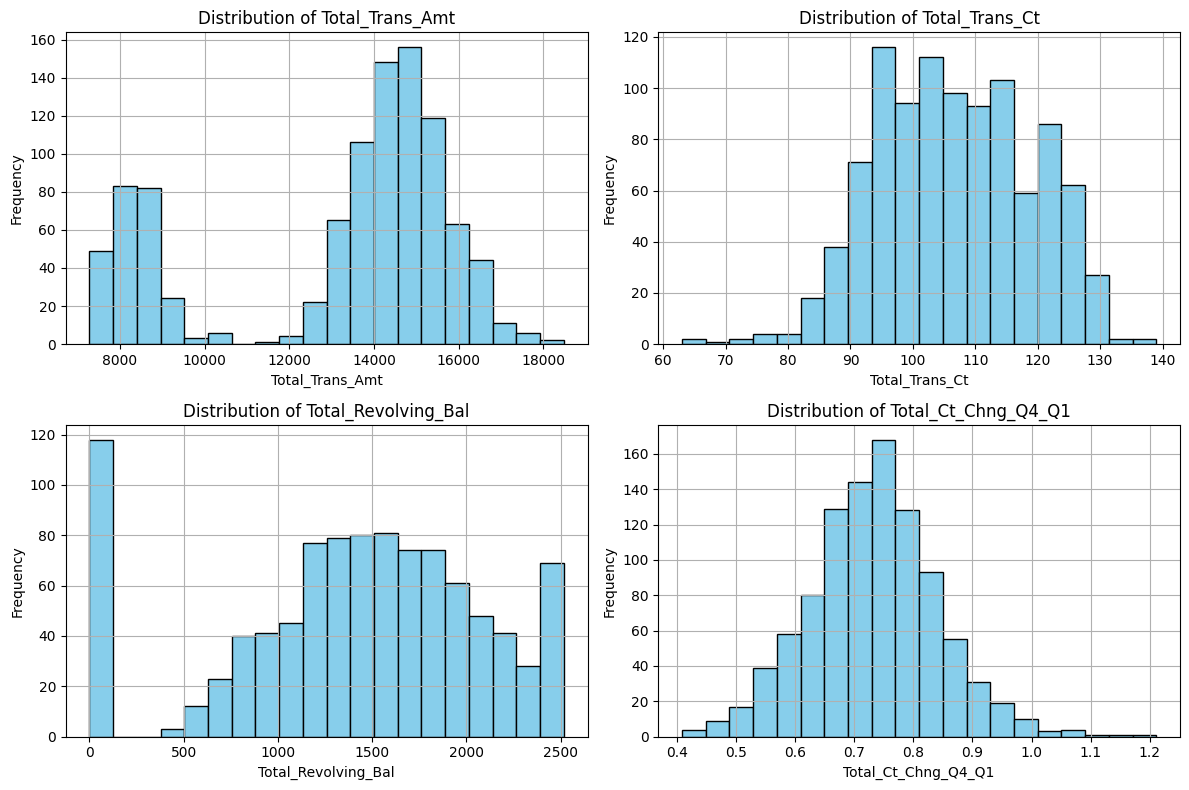

In [136]:

# لیست ستون‌های موردنظر
columns = ["Total_Trans_Amt", "Total_Trans_Ct", "Total_Revolving_Bal", "Total_Ct_Chng_Q4_Q1"]

# تنظیم اندازه صفحه و تعداد ساب‌پلات‌ها
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 layout

# رسم هیستوگرام برای هر ستون
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]  # انتخاب subplot
    high_risk_clients[column].hist(bins=20, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f"Distribution of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")

# تنظیم فاصله بین نمودارها
plt.tight_layout()
plt.show()


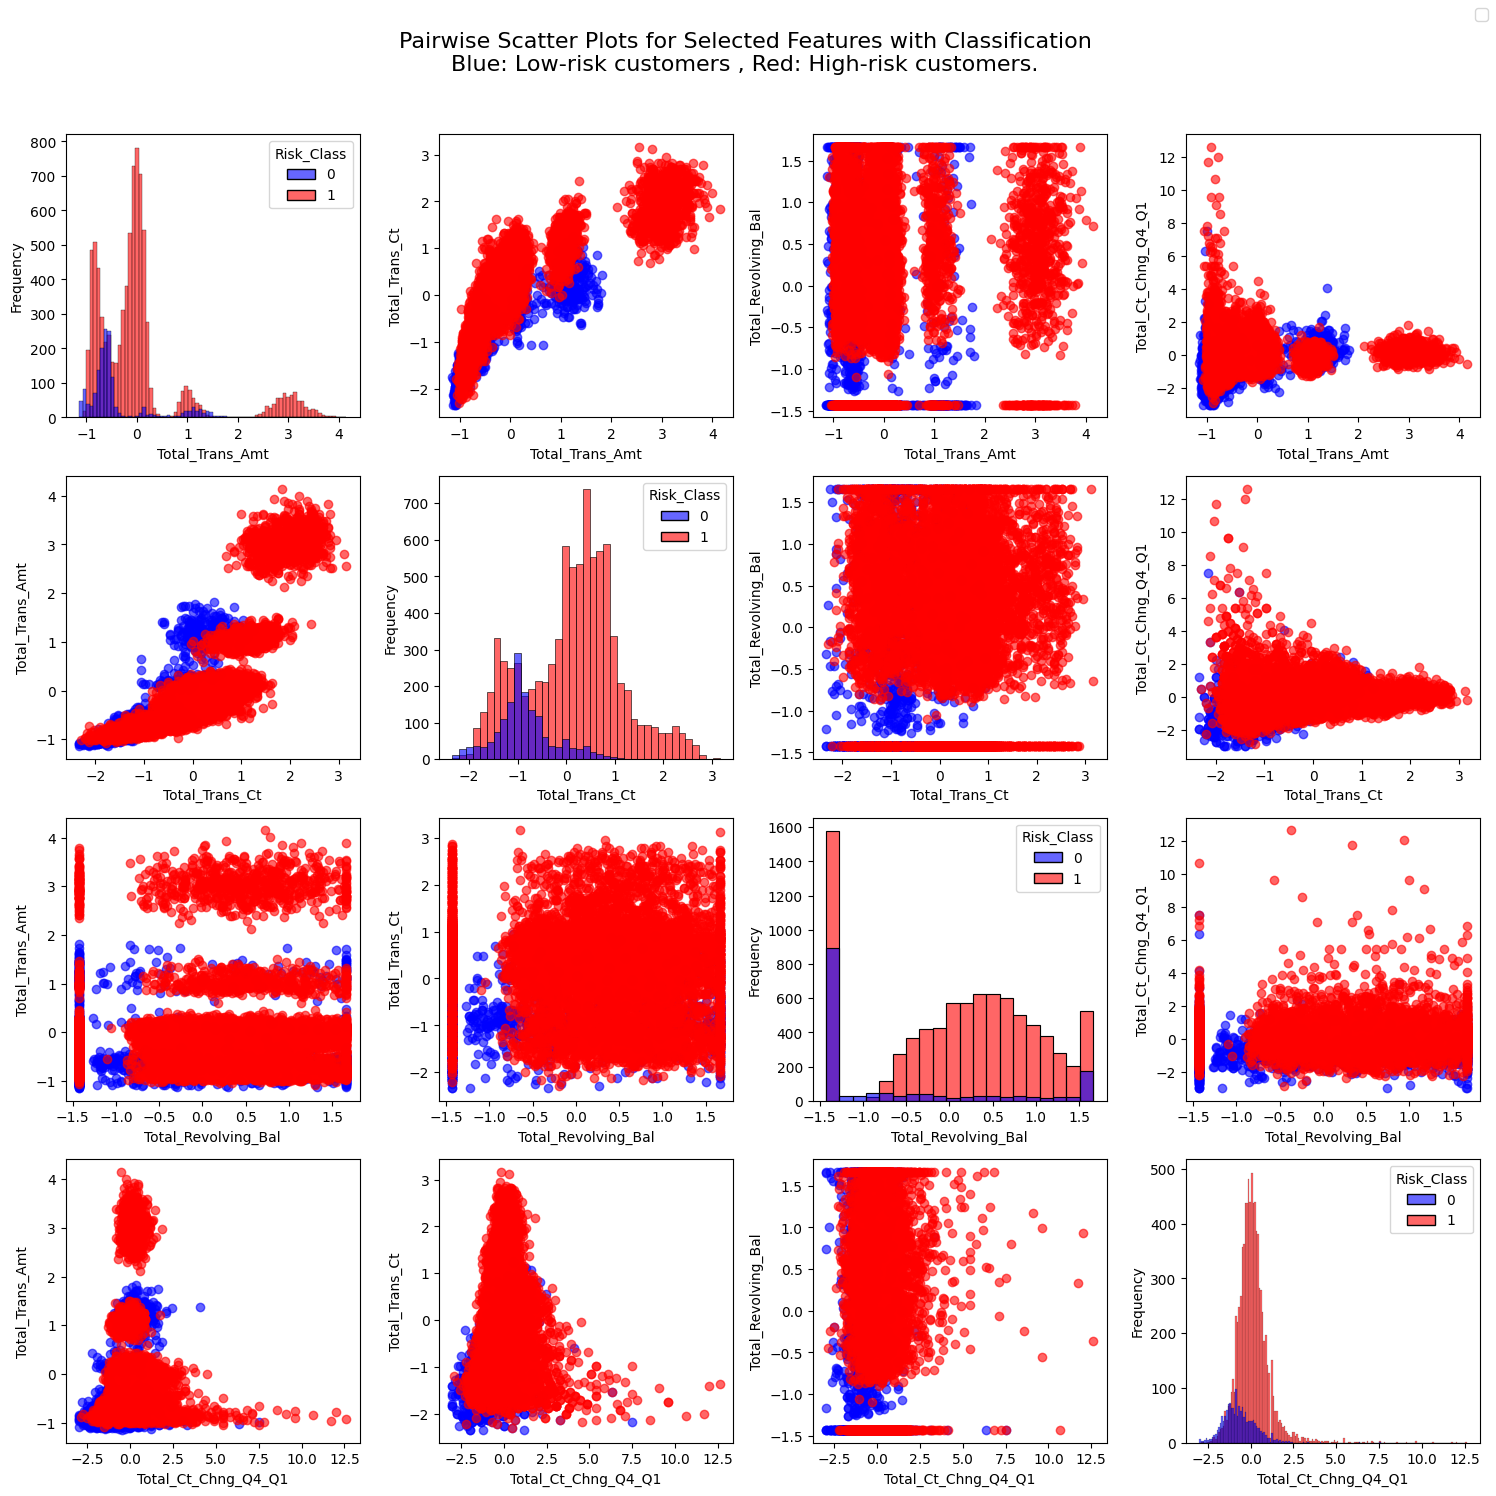

In [ ]:

# Selected features and scaled data
selected_features = ["Total_Trans_Amt", "Total_Trans_Ct", "Total_Revolving_Bal", "Total_Ct_Chng_Q4_Q1"]
scaled_data_df = pd.DataFrame(X_scaled, columns=features.columns)
scaled_data_df["Churn_Probability"] = main_data_encoded["Churn_Probability"]
scaled_data_df["Risk_Class"] = (scaled_data_df["Churn_Probability"] > 0.5).astype(int)

# Filter only selected features
selected_scaled_data = scaled_data_df[selected_features + ["Risk_Class"]]

# Generate pairwise scatter plots
fig, axes = plt.subplots(len(selected_features), len(selected_features), figsize=(15, 15))
fig.suptitle("Pairwise Scatter Plots for Selected Features with Classification\nBlue: Low-risk customers , Red: High-risk customers.", fontsize=16)

for i, feature_x in enumerate(selected_features):
    for j, feature_y in enumerate(selected_features):
        if i != j:
            # Scatter plot for different feature pairs
            ax = axes[i, j]
            for label, color in zip([0, 1], ['blue', 'red']):
                subset = selected_scaled_data[selected_scaled_data["Risk_Class"] == label]
                ax.scatter(
                    subset[feature_x], subset[feature_y],
                    label=f"Risk {label}" if (i == 0 and j == 1) else "",
                    alpha=0.6, c=color
                )
            ax.set_xlabel(feature_x)
            ax.set_ylabel(feature_y)
        else:
            # Diagonal: Plot histograms
            ax = axes[i, j]
            sns.histplot(data=selected_scaled_data, x=feature_x, hue="Risk_Class", palette=["blue", "red"], alpha=0.6, ax=ax)
            ax.set_xlabel(feature_x)
            ax.set_ylabel("Frequency")

# Add legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, ["Blue: Low-risk customers", "Red: High-risk customers"], loc="upper right", fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [117]:

# 1. read the main dataset
main_data = pd.read_csv("BankChurners.csv")
columns_to_drop = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
if isinstance(main_data, pd.DataFrame):
    main_data = main_data.drop(columns=[col for col in columns_to_drop if col in main_data.columns])
# 2. predict churn probabilities
# imagine we have already trained the model and have the random_forest model
predicted_proba = random_forest.predict_proba(X)  # خروجی احتمال از مدل

# 3. add the predicted probabilities to the main dataset
main_data["Churn_Probability"] = predicted_proba[:, 1]  # ستون احتمال ترک

# 4. filter high-risk clients based on the threshold
threshold = 0.5  # threshold for high-risk clients
high_risk_clients = main_data[main_data["Churn_Probability"] > threshold]

# 5. save the high-risk clients to a CSV file
high_risk_clients.to_csv("High_Risk_Clients.csv", index=False)


print(high_risk_clients.head())


   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Contacts_Count_12_mon  Credit_Limit  \
0              39  ...                      3       12691.0   
1              44  ...                

# dimension reduction

In [46]:
from sklearn.decomposition import PCA

# pca = PCA(n_components=(6))
# X_pca = pca.fit_transform(X)
# X_pca.shape
# X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2)

# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')


pca = PCA()
pca.fit(data_scaled)

# Show how much variance is explained by each of the individual features
pca.explained_variance_ratio_
# len(pca.explained_variance_ratio_)




array([0.1558432 , 0.11497033, 0.09075808, 0.0848604 , 0.06559919,
       0.05932595, 0.05257712, 0.05098808, 0.04982215, 0.04903893,
       0.04653094, 0.04380004, 0.0322129 , 0.03031867, 0.02494835,
       0.01999587, 0.01075586, 0.01047522, 0.0071787 , 0.        ])

In [47]:
# From the Variance by components graph, I choose to select 20 components to preserve at least 95% of the information.

pca_reduced = PCA(n_components = 20)
pca_reduced.fit(data_scaled_df)
pca_reduced.get_feature_names_out

# We need only the calculated resulting components scores for the elements in our data set:

data_pca = pca_reduced.transform(data_scaled_df)

# Clustering

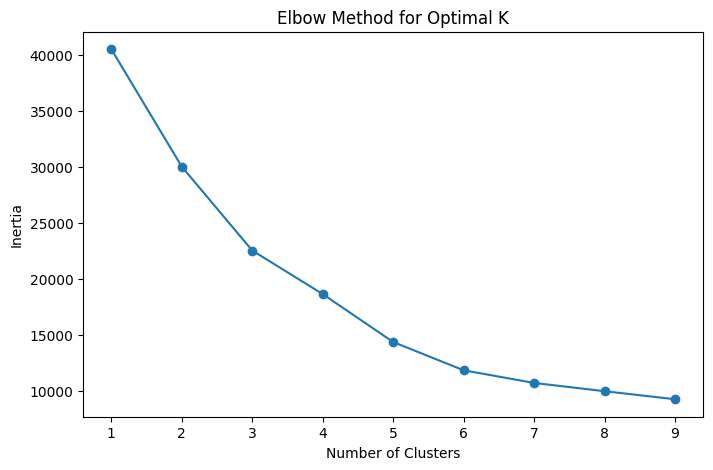

Cluster
0    5581
2    3552
1     994
Name: count, dtype: int64
         Total_Trans_Amt  Total_Trans_Ct  Total_Revolving_Bal  \
Cluster                                                         
0            3508.685182       61.863107          1688.047124   
1           13126.795775      106.534205          1398.727364   
2            3369.981700       57.902872           271.534910   

         Total_Ct_Chng_Q4_Q1  
Cluster                       
0                   0.755326  
1                   0.732900  
2                   0.638710  
      CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
8581  715091208  Existing Customer            42      M                3   
8586  713916708  Existing Customer            53      M                3   
8590  709474683  Existing Customer            42      F                3   
8591  772313358  Existing Customer            50      M                3   
8596  806432433  Existing Customer            40      F                2   

In [118]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. بارگذاری دیتاست اصلی
data = pd.read_csv("BankChurners.csv")

# انتخاب ویژگی‌های مرتبط برای خوشه‌بندی
features = ["Total_Trans_Amt", "Total_Trans_Ct", "Total_Revolving_Bal", "Total_Ct_Chng_Q4_Q1"]

# 2. پیش‌پردازش داده‌ها (استانداردسازی)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# 3. انتخاب تعداد بهینه خوشه‌ها با Elbow Method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# رسم نمودار Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# 4. اجرای K-Means با تعداد خوشه بهینه (مثلاً 3)
kmeans = KMeans(n_clusters=3, random_state=42)
data["Cluster"] = kmeans.fit_predict(scaled_features)

# 5. تحلیل خوشه‌ها
# بررسی تعداد مشتریان در هر خوشه
print(data["Cluster"].value_counts())

# میانگین ویژگی‌ها در هر خوشه
cluster_analysis = data.groupby("Cluster")[features].mean()
print(cluster_analysis)

# 6. فیلتر مشتریان در خوشه با ریسک بالا (مثلاً خوشه‌ای با تراکنش کم یا رفتار مشخص)
high_risk_cluster = 1  # فرض کنید خوشه 1 مشتریان با ریسک بالا هستند
high_risk_clients = data[data["Cluster"] == high_risk_cluster]

# ذخیره داده‌ها در فایل CSV
high_risk_clients.to_csv("High_Risk_Clients_Clustering.csv", index=False)

# نمایش چند نمونه از مشتریان با ریسک بالا
print(high_risk_clients.head())


In [ ]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3)
k_means.fit(X)

KMeans(n_clusters=3)

In [29]:
centers = k_means.cluster_centers_
labels = k_means.labels_

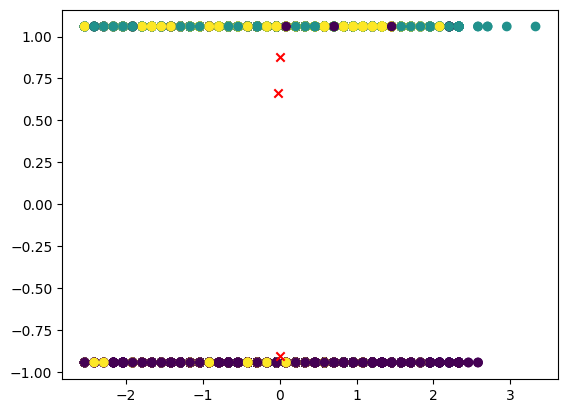

In [30]:
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centers[:,0],centers[:,1], c='red', marker='x')
plt.show()

K means

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normaliziation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(X_scaled)

centers = k_means.cluster_centers_
labels = k_means.labels_


plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100, label='Centers')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


(10127, 21)

DBSCAN

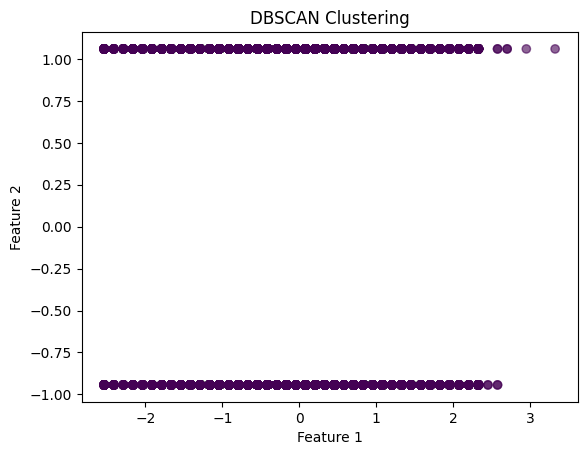

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# اجرای DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# رسم نمودار خوشه‌بندی
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


HDBSCAN

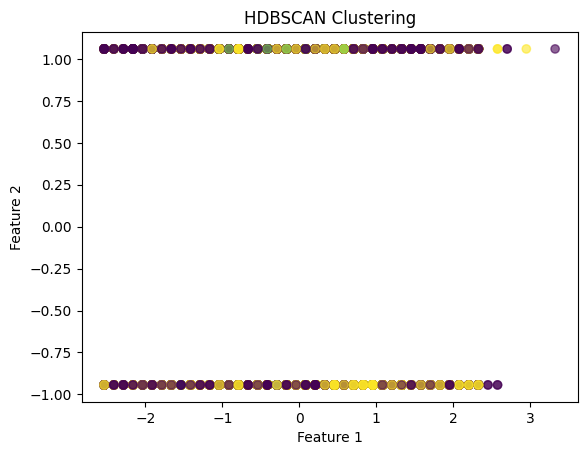

In [ ]:
import hdbscan

# اجرای HDBSCAN
clusterer = hdbscan.HDBSCAN()
labels = clusterer.fit_predict(X)

# رسم نمودار
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title("HDBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Optics

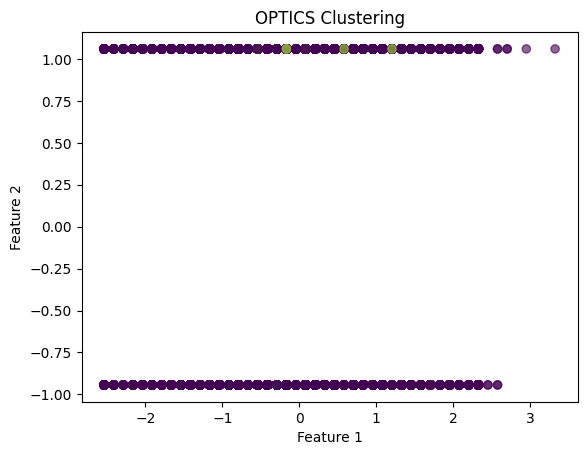

In [ ]:
from sklearn.cluster import OPTICS

# اجرای OPTICS
optics = OPTICS(min_samples=5)
labels = optics.fit_predict(X)

# رسم نمودار خوشه‌بندی
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title("OPTICS Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
